### NBA(National Basketball Association)
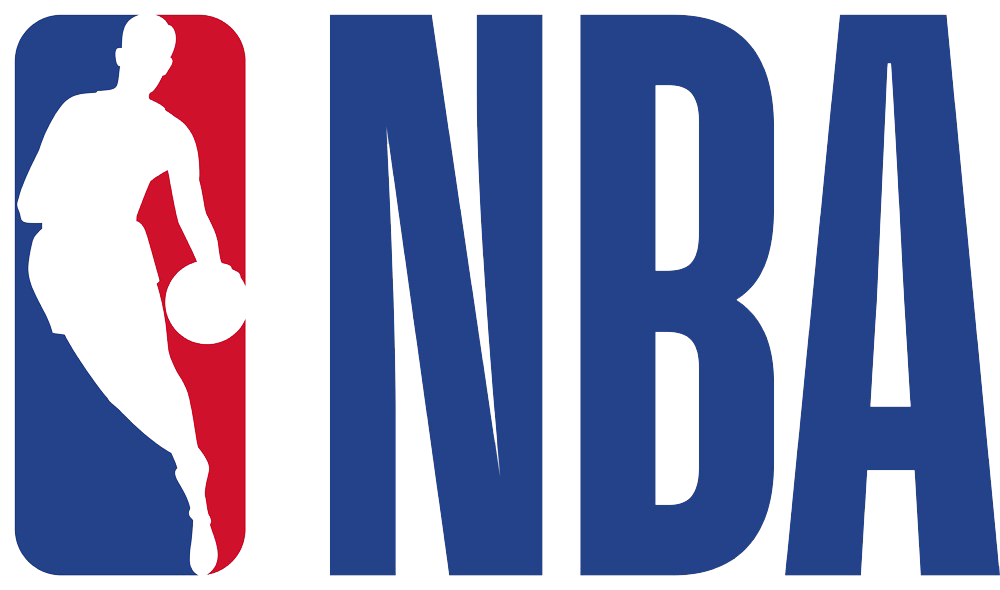


### Understanding Data
***Position Of Player***

 **PG**-- *Point guard*
 **SF**-- *Small forward*
 **SG**-- *Shooting guard*
 **PF**-- *Power forward*
 **C**-- *Center*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the CSV files 
df=pd.read_csv("nba.csv",encoding='unicode_escape')

In [10]:
df.shape

(457, 8)

In [11]:
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0


In [12]:
df.tail()

,Name,Team,Number,Position,Age,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41,PF,20,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,231,Kansas,947276.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Weight    457 non-null    int64  
 6   College   373 non-null    object 
 7   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


### Data Cleaning

In [16]:
pd.isnull(df).sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary      11
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
pd.isnull(df).sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Weight      0
College     0
Salary      0
dtype: int64

### Data Transformation

*Creating a new column (BMI) using a fixed Height Value*

In [21]:
fix_height= 75

In [22]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [24]:
df['BMI']=(df['Weight']/(fix_height**2))*703

In [25]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'BMI'],
      dtype='object')

In [26]:
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,BMI
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0,22.496000
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0,29.369778
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN,25.620444
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0,23.120889
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0,28.869867


### EXPLORATORY DATA ANALYSIS

In [29]:
df[['Age','Weight','BMI']].describe()

,Age,Weight,BMI
count,457.000000,457.000000,457.000000
mean,26.938731,221.522976,27.685449
std,4.404016,26.368343,3.295457
min,19.000000,161.000000,20.121422
25%,24.000000,200.000000,24.995556
50%,26.000000,220.000000,27.495111
75%,30.000000,240.000000,29.994667
max,40.000000,307.000000,38.368178


*From above chart we can get information the Mean of Age and BMI is 27 and 28 approx respectively*

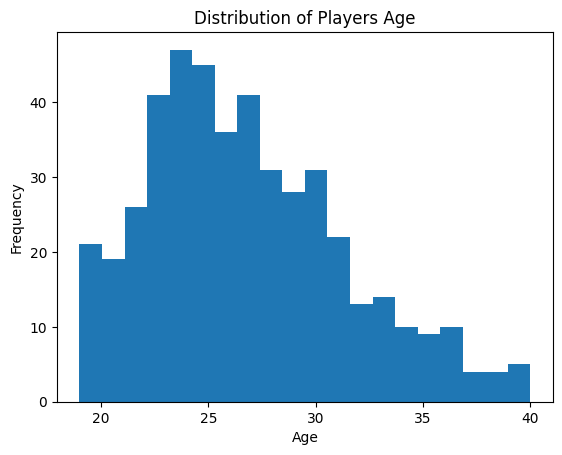

In [34]:
plt.hist(df['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Players Age')
plt.show()

*From the above histogram it shows distributions of Players age with intervals(20)*

<Figure size 1000x600 with 0 Axes>

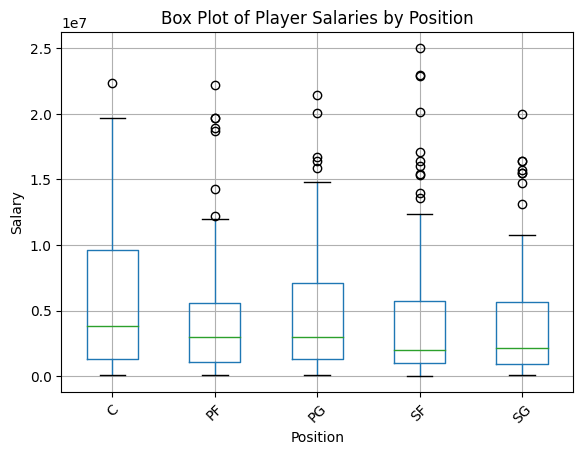

In [35]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Salary', by='Position')
plt.ylabel('Salary')
plt.title('Box Plot of Player Salaries by Position')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

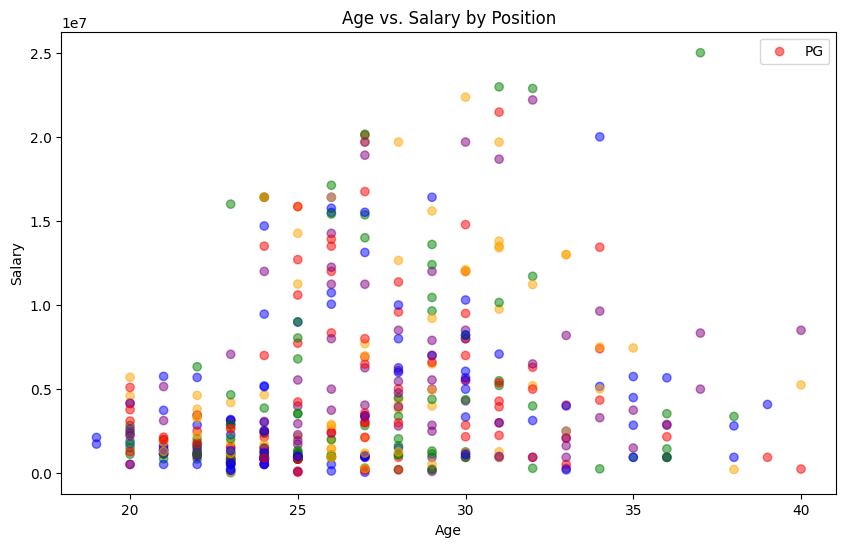

In [36]:
# Scatter plot of 'age' vs. 'salary' by position
plt.figure(figsize=(10, 6))
colors = {'PG': 'red', 'SG': 'blue', 'SF': 'green', 'PF': 'purple', 'C': 'orange'}
plt.scatter(df['Age'], df['Salary'], c=df['Position'].map(colors), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary by Position')
plt.legend(colors)
plt.show()

In [5]:
#Top Players in terms of salary
top_players=df.nlargest(10,'Salary')
print(top_players)


                Name                   Team  Number Position  Age  Weight  \
109      Kobe Bryant     Los Angeles Lakers      24       SF   37     212   
169     LeBron James    Cleveland Cavaliers      23       SF   31     250   
33   Carmelo Anthony        New York Knicks       7       SF   32     240   
251    Dwight Howard        Houston Rockets      12        C   30     265   
339       Chris Bosh             Miami Heat       1       PF   32     235   
100       Chris Paul   Los Angeles Clippers       3       PG   31     175   
414     Kevin Durant  Oklahoma City Thunder      35       SF   27     240   
164     Derrick Rose          Chicago Bulls       1       PG   27     190   
349      Dwyane Wade             Miami Heat       3       SG   34     220   
23       Brook Lopez          Brooklyn Nets      11        C   28     275   

          College      Salary  
109           NaN  25000000.0  
169           NaN  22970500.0  
33       Syracuse  22875000.0  
251           NaN  22359

*The above data shows the top-10 players having highest salary* 

In [8]:
#Top colleges showing participation strength
top_college=df['College'].value_counts().nlargest(5)
print(top_college)

College
Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Name: count, dtype: int64


*From above analysis we can view the Top college in participation is Kentucky*

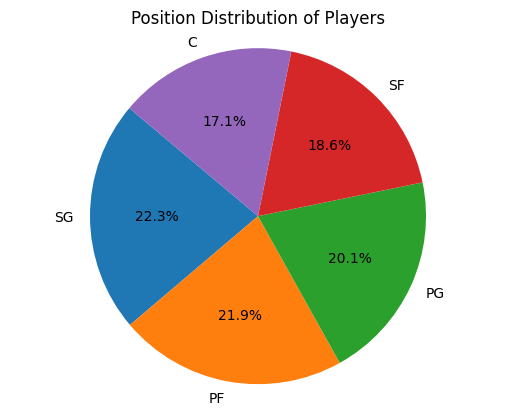

In [15]:
#Position Distribution using charts
position_counts = df['Position'].value_counts()
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Position Distribution of Players')
plt.axis('equal')
plt.show()

*Above Pie charts gives the visuals that the top position distribution of players goes to SG followed by PF,PG,SF,C*

In [16]:
#Team Analysis:
avg_salary_by_team=df.groupby('Team')['Salary'].mean()
print(avg_salary_by_team)

Team
Atlanta Hawks             4.860197e+06
Boston Celtics            4.181505e+06
Brooklyn Nets             3.501898e+06
Charlotte Hornets         5.222728e+06
Chicago Bulls             5.785559e+06
Cleveland Cavaliers       7.642049e+06
Dallas Mavericks          4.746582e+06
Denver Nuggets            4.294424e+06
Detroit Pistons           4.477884e+06
Golden State Warriors     5.924600e+06
Houston Rockets           5.018868e+06
Indiana Pacers            4.450122e+06
Los Angeles Clippers      6.323643e+06
Los Angeles Lakers        4.784695e+06
Memphis Grizzlies         5.467920e+06
Miami Heat                6.347359e+06
Milwaukee Bucks           4.350220e+06
Minnesota Timberwolves    4.593054e+06
New Orleans Pelicans      4.355304e+06
New York Knicks           4.581494e+06
Oklahoma City Thunder     6.251020e+06
Orlando Magic             4.297248e+06
Philadelphia 76ers        2.213778e+06
Phoenix Suns              4.229676e+06
Portland Trail Blazers    3.220121e+06
Sacramento Kings    

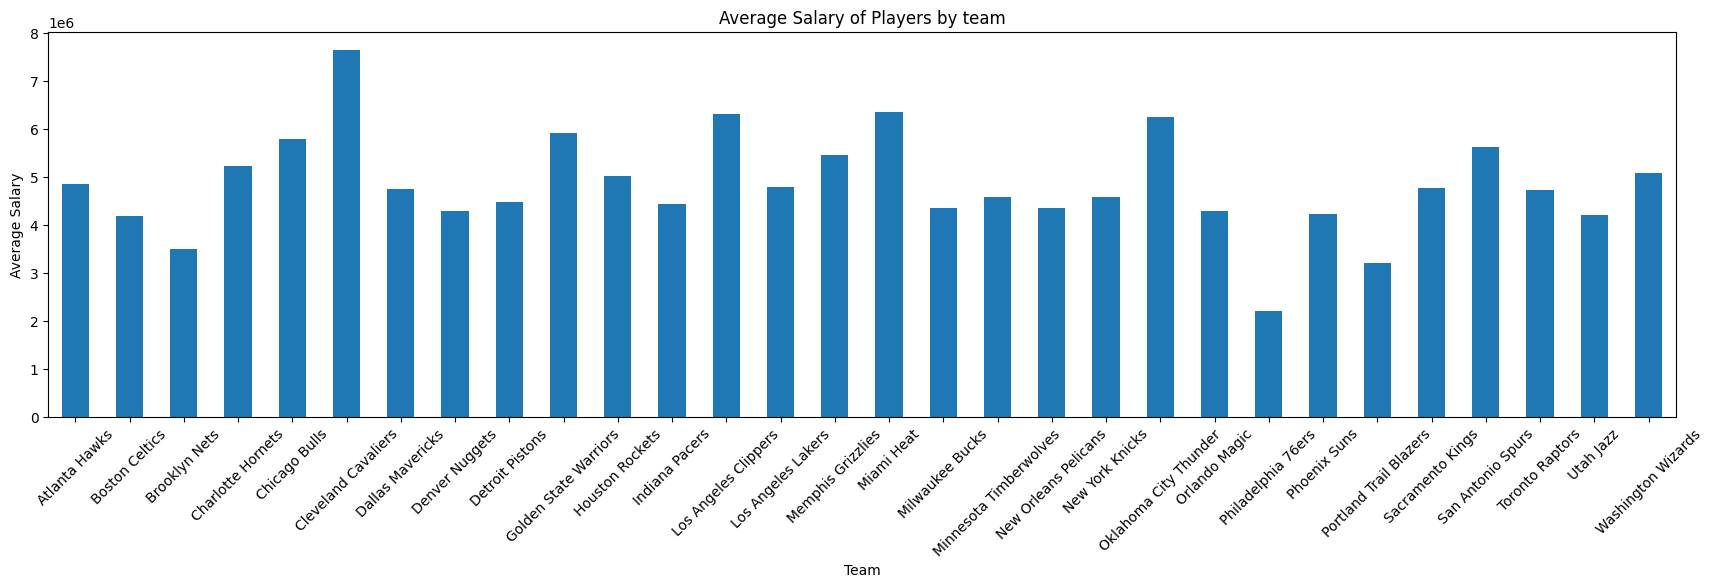

In [25]:
plt.figure(figsize=(21,5))
avg_salary_by_team.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.title('Average Salary of Players by team')
plt.xticks(rotation=45)
plt.show()

*Above chart shows visuals of Team(Cleveland Cavaliers) has highest salary among all teams*

### Conclusion
* From above data analysis we can conclude some interesting factors like Highest salary(Cleveland Cavaliers),most persons having position in SG
* Top player having highest salary is Kobe Bryant*